<a href="https://colab.research.google.com/github/AnnaPaulaFigueiredo/Imersao-Dados-Alura/blob/main/Dia3Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)


exam = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
# Adicionando uma coluna de notas totais
totalGrade = data[exam].sum(axis=1)

# Adicionando no dataframe dados
data["NU_NOTA_TOTAL"] = totalGrade
data.head()

# Filtrando o dataset, onde a nota total não é zero
dataNotZero = data.query("NU_NOTA_TOTAL != 0")

Desafio 1: Plotar as médias, medianas e modas nas notas de LC e MT (traçar linhas no plot)

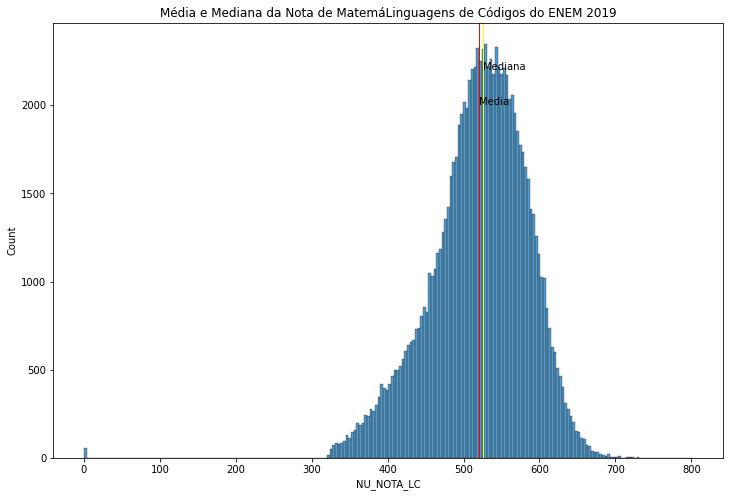

In [51]:
plt.figure(figsize=(12,8))
plt.axvline(dataNotZero["NU_NOTA_LC"].mean(), color='Red', linewidth=1)
plt.axvline(dataNotZero["NU_NOTA_LC"].median(),color='Yellow', linewidth=1)

plt.text(x = dataNotZero["NU_NOTA_LC"].mean(),  y=2000, s='Media', color = 'black')
plt.text(x = dataNotZero["NU_NOTA_LC"].median(),  y=2200, s='Mediana', color = 'black')

plt.title("Média e Mediana da Nota de MatemáLinguagens de Códigos do ENEM 2019")

sns.histplot(dataNotZero, x="NU_NOTA_LC")

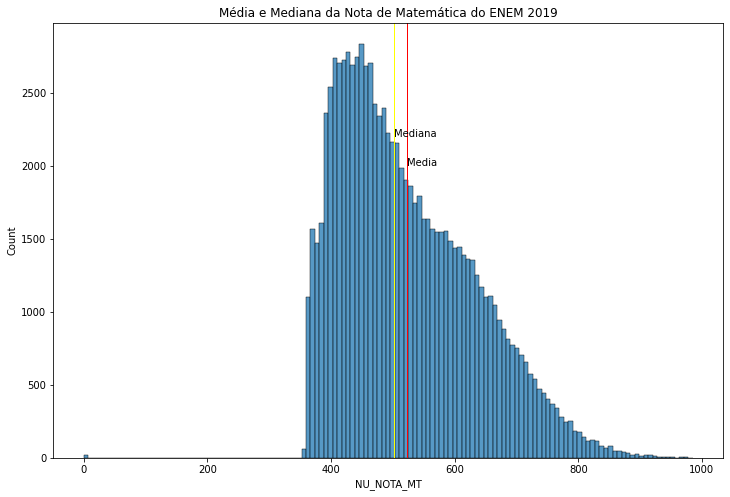

In [52]:
plt.figure(figsize=(12,8))
plt.axvline(dataNotZero["NU_NOTA_MT"].mean(), color='Red', linewidth=1)
plt.axvline(dataNotZero["NU_NOTA_MT"].median(),color='Yellow', linewidth=1)

plt.text(x = dataNotZero["NU_NOTA_MT"].mean(),  y=2000, s='Media', color = 'black')
plt.text(x = dataNotZero["NU_NOTA_MT"].median(),  y=2200, s='Mediana', color = 'black')

plt.title("Média e Mediana da Nota de Matemática do ENEM 2019")
sns.histplot(dataNotZero, x="NU_NOTA_MT")

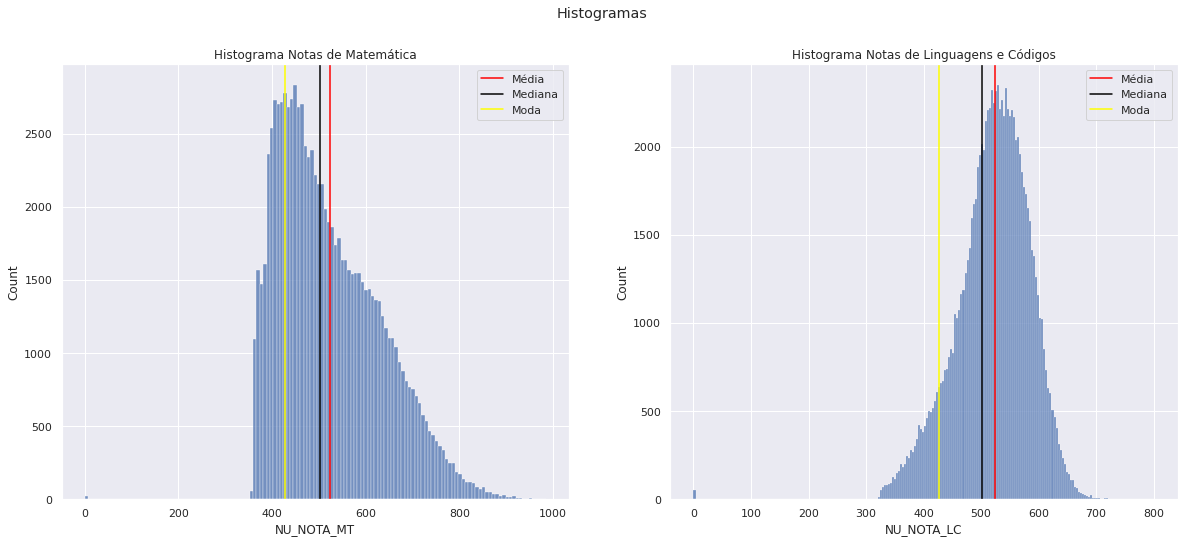

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [83]:
# Histogrma Lado a lado
sns.set()
fig, axes = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle("Histogramas")

# Para MT
plt.figure(figsize=(12,8))
sns.histplot(ax= axes[0], x = "NU_NOTA_MT", data=dataNotZero)

meanMT = dataNotZero["NU_NOTA_MT"].mean()
medianMT = dataNotZero["NU_NOTA_MT"].median()
modeMT = float(dataNotZero["NU_NOTA_MT"].mode())

axes[0].axvline(meanMT, ymin=0, ymax=1, c= 'red')
axes[0].axvline(medianMT, ymin=0, ymax=1, c= 'black')
axes[0].axvline(modeMT, ymin=0, ymax=1, c= 'yellow')
axes[0].set_title('Histograma Notas de Matemática')
axes[0].legend(["Média", "Mediana", "Moda"])


# Para LC
plt.figure(figsize=(12,8))
sns.histplot(ax= axes[1], x = "NU_NOTA_LC", data=dataNotZero)

meanLC = dataNotZero["NU_NOTA_LC"].mean()
medianLC = dataNotZero["NU_NOTA_LC"].median()
modeLC = float(dataNotZero["NU_NOTA_LC"].mode())

axes[1].axvline(meanMT, ymin=0, ymax=1, c= 'red')
axes[1].axvline(medianMT, ymin=0, ymax=1, c= 'black')
axes[1].axvline(modeMT, ymin=0, ymax=1, c= 'yellow')
axes[1].set_title('Histograma Notas de Linguagens e Códigos')
axes[1].legend(["Média", "Mediana", "Moda"])


Desafio 2: Criar a matriz de correlação diagonal.

In [53]:
corr = dataNotZero[exam].corr()
corr

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000


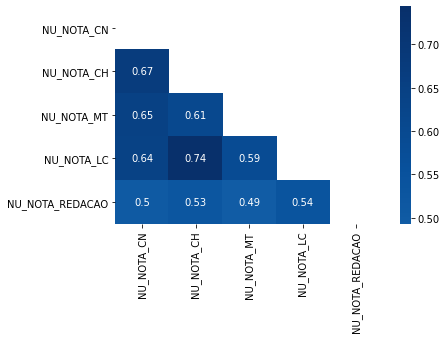

In [54]:
mask = np.triu(np.ones_like(corr, dtype=int))

sns.heatmap(corr, mask=mask, cmap="Blues", center=0, annot=True)

Desafio 3: Filtrar as notas por seu estado ou a sua cidade e refazer as analises, verificando se são semelhantes ao geral.

In [60]:
# Filtrando os dados
brazil = dataNotZero.query("SG_UF_RESIDENCIA != 'MG'")

minas = dataNotZero.query("SG_UF_RESIDENCIA == 'MG'")


In [65]:
# gerando a correlação
corrBrazil = brazil[exam].corr()

corrMinas = minas[exam].corr()

Text(0.5, 1.0, 'Minas Gerais')

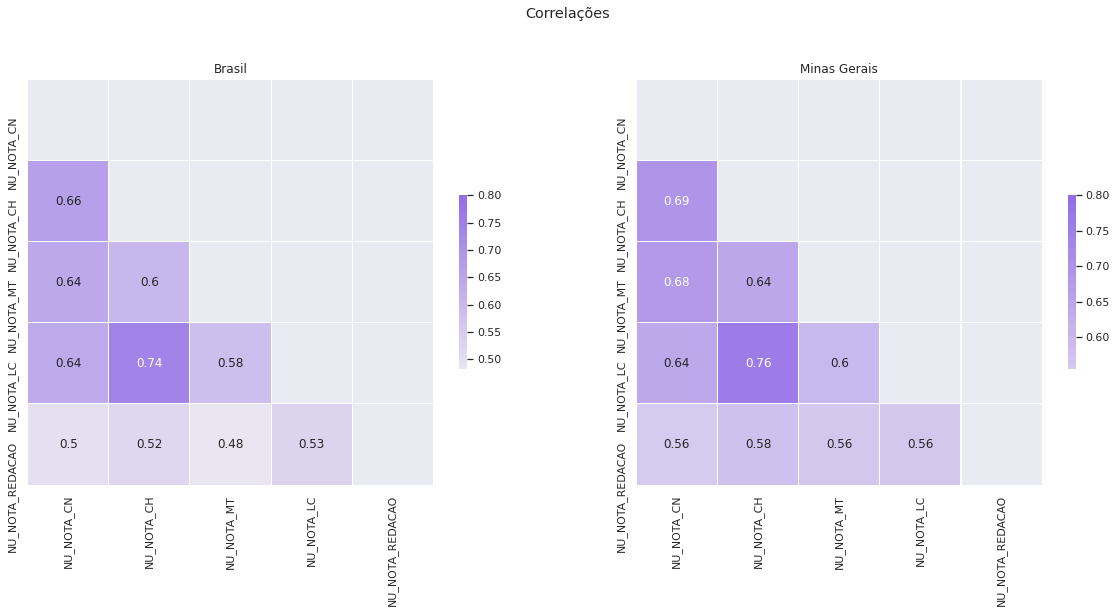

In [100]:
sns.set()
fig, axes = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle("Correlações")

# Brazil
mask = np.triu(np.ones_like(corrBrazil, dtype=bool))
sns.heatmap(ax=axes[0], data = corrBrazil, mask=mask, cmap=cmap, center= 0.45, vmax=0.8,
            square=True, linewidths=.1, cbar_kws={"shrink": 0.4}, annot=True)
axes[0].set_title('Brasil')

# Minas
mask = np.triu(np.ones_like(corrBrazil, dtype=bool))
sns.heatmap(ax=axes[1], data = corrMinas, mask=mask, cmap=cmap, center= 0.45, vmax=0.8,
            square=True, linewidths=.1, cbar_kws={"shrink": 0.4}, annot=True)
axes[1].set_title('Minas Gerais')

Desafio4: Pensar sobre a correlação entre matemática e Linguagens.